# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['albany', 'mar del plata', 'taolanaro', 'rikitea', 'puerto ayora', 'belushya guba', 'cairns', 'georgetown', 'iqaluit', 'butaritari', 'clyde river', 'geraldton', 'shenjiamen', 'cape town', 'illoqqortoormiut', 'ilhabela', 'mangaluru', 'ushuaia', 'los llanos de aridane', 'attawapiskat', 'port alfred', 'fairbanks', 'ranong', 'uspenka', 'filingue', 'alofi', 'nouadhibou', 'daokou', 'nizhneyansk', 'new norfolk', 'hesla', 'hamilton', 'storforshei', 'jamestown', 'kapaa', 'hovd', 'kavieng', 'aranos', 'bethel', 'bengkulu', 'heilbronn', 'malmesbury', 'puerto el triunfo', 'torbay', 'emerald', 'chuy', 'dikson', 'tsihombe', 'husavik', 'ushtobe', 'hilo', 'busselton', 'peleduy', 'vaini', 'kununurra', 'puerto escondido', 'havoysund', 'port elizabeth', 'yialos', 'upernavik', 'northam', 'bredasdorp', 'punta arenas', 'saleaula', 'mayumba', 'lompoc', 'cehegin', 'atambua', 'hokitika', 'atuona', 'yellowknife', 'narsaq', 'aketi', 'berbera', 'mataura', 'ahumada', 'barrow', 'port blair', 'vila franca do campo',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create base url & query url
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

units = 'imperial'

query_url = base_url + "units=" + units + "&appid=" + weather_api_key
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e12ce9f247c079f7a7228362970b8381


In [4]:
#generate a list to store teh city data
cloudinesses = []
cities_list = []
dates = []
humidities = []
lat = []
lon = []
temp_max = []
wind_speeds = []
countries = []

# keep track of the record and set being processed
record =0
sets = 1

print("--------------------------Beginning Data Retrieval----------------------------")
for city in cities:
   
    
    #print(response)
    try:
        print(f"Processing Record {record} of set {sets} | {city}")
        
        city_url = query_url + "&q=" + city
        response = requests.get(city_url).json()
        time.sleep(1)
        
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        cities_list.append(response['name'])
        cloudinesses.append(response['clouds']['all'])
        humidities.append(response['main']['humidity'])
        wind_speeds.append(response['wind']['speed'])
        temp_max.append(response['main']['temp'])
    

        print(response['name'])
        record += 1
    except:
         print(f"City not found. Skipping...")

    if record == 50:
        sets += 1
        record = 1
      
  
print('---------------------Data Retrival Complete------------------------')            

--------------------------Beginning Data Retrieval----------------------------
Processing Record 0 of set 1 | albany
Albany
Processing Record 1 of set 1 | mar del plata
Mar del Plata
Processing Record 2 of set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of set 1 | rikitea
Rikitea
Processing Record 3 of set 1 | puerto ayora
Puerto Ayora
Processing Record 4 of set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of set 1 | cairns
Cairns
Processing Record 5 of set 1 | georgetown
George Town
Processing Record 6 of set 1 | iqaluit
Iqaluit
Processing Record 7 of set 1 | butaritari
Butaritari
Processing Record 8 of set 1 | clyde river
Clyde River
Processing Record 9 of set 1 | geraldton
Geraldton
Processing Record 10 of set 1 | shenjiamen
Shenjiamen
Processing Record 11 of set 1 | cape town
Cape Town
Processing Record 12 of set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of set 1 | ilhabela
Ilhabela
Processing Record 13 of set 1 | m

Nālūt
Processing Record 43 of set 3 | taoudenni
Taoudenni
Processing Record 44 of set 3 | sibu
Sibu
Processing Record 45 of set 3 | salinopolis
Salinópolis
Processing Record 46 of set 3 | tibu
Tibú
Processing Record 47 of set 3 | merauke
Merauke
Processing Record 48 of set 3 | hasaki
Hasaki
Processing Record 49 of set 3 | bahir dar
Bahir Dar
Processing Record 1 of set 4 | arteni
Arteni
Processing Record 2 of set 4 | ishigaki
Ishigaki
Processing Record 3 of set 4 | lorengau
Lorengau
Processing Record 4 of set 4 | tanjong karang
City not found. Skipping...
Processing Record 4 of set 4 | ayr
Ayr
Processing Record 5 of set 4 | umm kaddadah
Umm Kaddadah
Processing Record 6 of set 4 | solovetskiy
City not found. Skipping...
Processing Record 6 of set 4 | mocajuba
Mocajuba
Processing Record 7 of set 4 | norman wells
Norman Wells
Processing Record 8 of set 4 | oliveira dos brejinhos
Oliveira dos Brejinhos
Processing Record 9 of set 4 | malakal
Malakal
Processing Record 10 of set 4 | ilulissat


Hong Kong
Processing Record 37 of set 6 | saint-philippe
Saint-Philippe
Processing Record 38 of set 6 | hasanpur
Hasanpur
Processing Record 39 of set 6 | tautira
Tautira
Processing Record 40 of set 6 | mahibadhoo
Mahibadhoo
Processing Record 41 of set 6 | bela
Bela
Processing Record 42 of set 6 | tshikapa
Tshikapa
Processing Record 43 of set 6 | zhoucheng
Zhoucheng
Processing Record 44 of set 6 | yanzhou
Yanzhou
Processing Record 45 of set 6 | constitucion
Constitución
Processing Record 46 of set 6 | urdzhar
City not found. Skipping...
Processing Record 46 of set 6 | tlaxiaco
City not found. Skipping...
Processing Record 46 of set 6 | bendigo
Bendigo
Processing Record 47 of set 6 | lingao
Lingao
Processing Record 48 of set 6 | bechem
Bechem
Processing Record 49 of set 6 | saint george
Saint George
Processing Record 1 of set 7 | ixtapa
Ixtapa
Processing Record 2 of set 7 | kigoma
Kigoma
Processing Record 3 of set 7 | haibowan
City not found. Skipping...
Processing Record 3 of set 7 | no

Lábrea
Processing Record 36 of set 9 | belaya gora
Belaya Gora
Processing Record 37 of set 9 | talara
Talara
Processing Record 38 of set 9 | longford
Longford
Processing Record 39 of set 9 | santiago de cuba
Santiago de Cuba
Processing Record 40 of set 9 | leshan
Leshan
Processing Record 41 of set 9 | waingapu
Waingapu
Processing Record 42 of set 9 | valcourt
Valcourt
Processing Record 43 of set 9 | xingcheng
Xingcheng
Processing Record 44 of set 9 | toliary
City not found. Skipping...
Processing Record 44 of set 9 | jishou
Jishou
Processing Record 45 of set 9 | sakakah
Sakakah
Processing Record 46 of set 9 | mae tha
Mae Tha
Processing Record 47 of set 9 | tabory
Tabory
Processing Record 48 of set 9 | necochea
Necochea
Processing Record 49 of set 9 | chaman
Chaman
Processing Record 1 of set 10 | bairnsdale
Bairnsdale
Processing Record 2 of set 10 | jodhpur
Jodhpur
Processing Record 3 of set 10 | okha
Okha
Processing Record 4 of set 10 | barawe
City not found. Skipping...
Processing Rec

Zhangaözen
---------------------Data Retrival Complete------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
response

{'coord': {'lon': 52.8, 'lat': 43.3},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 5.9,
  'feels_like': -1.8,
  'temp_min': 5.9,
  'temp_max': 5.9,
  'pressure': 1042,
  'humidity': 88,
  'sea_level': 1042,
  'grnd_level': 1016},
 'visibility': 10000,
 'wind': {'speed': 2.75, 'deg': 342},
 'clouds': {'all': 0},
 'dt': 1614224910,
 'sys': {'country': 'KZ', 'sunrise': 1614222719, 'sunset': 1614262327},
 'timezone': 18000,
 'id': 607610,
 'name': 'Zhangaözen',
 'cod': 200}

In [6]:
print(len(dates))


578


In [7]:
#create pandas df
weather_df = pd.DataFrame({"Countries": countries,
                           "City": cities_list,
                           "Lat": lat,
                           "Lon":lon,
                           "Date": dates,
                           "Max Temp (F)": temp_max,
                           "Humidities %": humidities,
                           "Cloudinesses": cloudinesses,
                           "Wind Speed": wind_speeds})
#display the df
weather_df.head()

,Countries,City,Lat,Lon,Date,Max Temp (F),Humidities %,Cloudinesses,Wind Speed
0,US,Albany,42.6001,-73.9662,1614223954,44.44,45,100,6.11
1,AR,Mar del Plata,-38.0023,-57.5575,1614223800,55.40,100,0,4.61
2,PF,Rikitea,-23.1203,-134.9692,1614224096,78.98,80,100,26.51
3,EC,Puerto Ayora,-0.7393,-90.3518,1614224097,79.00,91,83,5.99
4,AU,Cairns,-16.9167,145.7667,1614223918,78.80,89,75,14.97


In [8]:
weather_df.tail(25)

#save data to csv
weather_df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Get the indices of cities that have humidity over 100%.
new_weather_df = weather_df[weather_df["Humidities %"] < 100 ]
weather_df = new_weather_df.dropna(how='all')
weather_df


,Countries,City,Lat,Lon,Date,Max Temp (F),Humidities %,Cloudinesses,Wind Speed
0,US,Albany,42.6001,-73.9662,1614223954,44.44,45,100,6.11
2,PF,Rikitea,-23.1203,-134.9692,1614224096,78.98,80,100,26.51
3,EC,Puerto Ayora,-0.7393,-90.3518,1614224097,79.00,91,83,5.99
4,AU,Cairns,-16.9167,145.7667,1614223918,78.80,89,75,14.97
5,MY,George Town,5.4112,100.3354,1614223802,82.98,69,20,6.91
...,...,...,...,...,...,...,...,...,...
573,NI,Corn Island,12.1694,-83.0418,1614224904,81.03,75,48,20.15
574,JP,Katsuura,35.1333,140.3000,1614224905,46.51,31,40,3.44
575,PG,Daru,-9.0763,143.2092,1614224907,83.97,80,45,10.69
576,CD,Libenge,3.6500,18.6333,1614224908,68.02,42,43,2.64


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

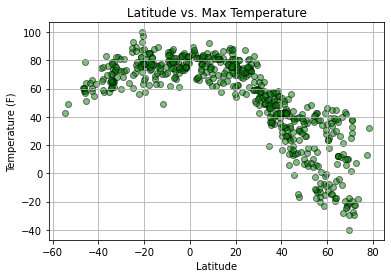

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp (F)"],
            marker="o",
            facecolors="green",
            edgecolors="black",
            alpha = 0.5 )

# Incorporate the other graph properties
plt.title(f'Latitude vs. Max Temperature')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_Vs_Max_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

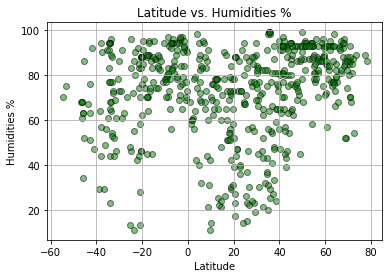

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidities %"],
            marker="o",
            facecolors="green",
            edgecolors="black",
            alpha = 0.5 )

# Incorporate the other graph properties
plt.title(f'Latitude vs. Humidities %')
plt.ylabel("Humidities %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_Vs_Humidities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

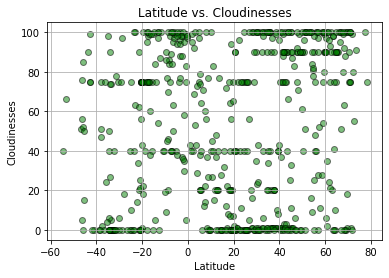

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudinesses"],
            marker="o",
            facecolors="green",
            edgecolors="black",
            alpha = 0.5 )

# Incorporate the other graph properties
plt.title(f'Latitude vs. Cloudinesses')
plt.ylabel("Cloudinesses")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_Vs_Cloudinesses.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

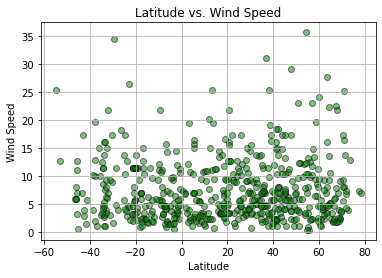

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"],
            marker="o",
            facecolors="green",
            edgecolors="black",
            alpha = 0.5 )

# Incorporate the other graph properties
plt.title(f'Latitude vs. Wind Speed')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_Vs_Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
#create df for the two different hemisphere
northern_hemi = weather_df.loc[weather_df["Lat"] >= 0.0]
northern_hemi

southern_hemi = weather_df.loc[weather_df["Lat"] < 0.0]
southern_hemi

,Countries,City,Lat,Lon,Date,Max Temp (F),Humidities %,Cloudinesses,Wind Speed
2,PF,Rikitea,-23.1203,-134.9692,1614224096,78.98,80,100,26.51
3,EC,Puerto Ayora,-0.7393,-90.3518,1614224097,79.00,91,83,5.99
4,AU,Cairns,-16.9167,145.7667,1614223918,78.80,89,75,14.97
9,AU,Geraldton,-28.7667,114.6000,1614223862,80.60,61,0,11.50
11,ZA,Cape Town,-33.9258,18.4232,1614224078,66.31,68,0,16.11
...,...,...,...,...,...,...,...,...,...
559,ID,Labuhan,-6.8844,112.2051,1614224886,81.68,82,100,15.73
561,AU,Roebourne,-20.7833,117.1333,1614224889,99.79,28,0,6.98
564,UY,Departamento de Maldonado,-34.6667,-54.9167,1614224893,66.09,94,0,3.44
566,ID,Sorong,-0.8833,131.2500,1614224895,83.21,70,5,4.85


In [15]:
# Generate x and y values 
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp (F)"]

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

0      37.124719
2      81.050826
3      66.091845
4      76.904472
5      61.980983
         ...    
573    57.463947
574    42.115368
575    71.664117
576    63.158131
577    36.656921
Name: Lat, Length: 566, dtype: float64
y = -0.67x + 65.6


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7301945510827899


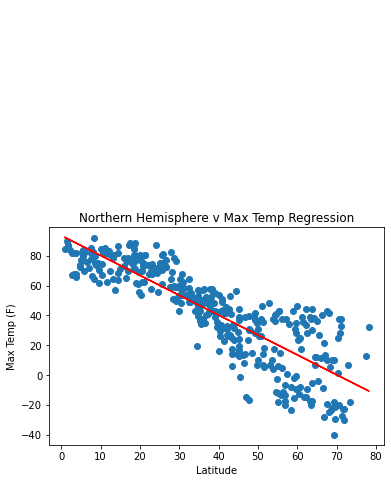

In [16]:
# the x and y values
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Max Temp (F)"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Northern Hemisphere v Max Temp Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# annoations,color,fontsize
plt.annotate(line_eq,(10,240), fontsize=12, color="red",)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/nh_Vs_max_temp.png")

# Show plot
plt.show()

The graph above is showing a negative correlation 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2628525196607999


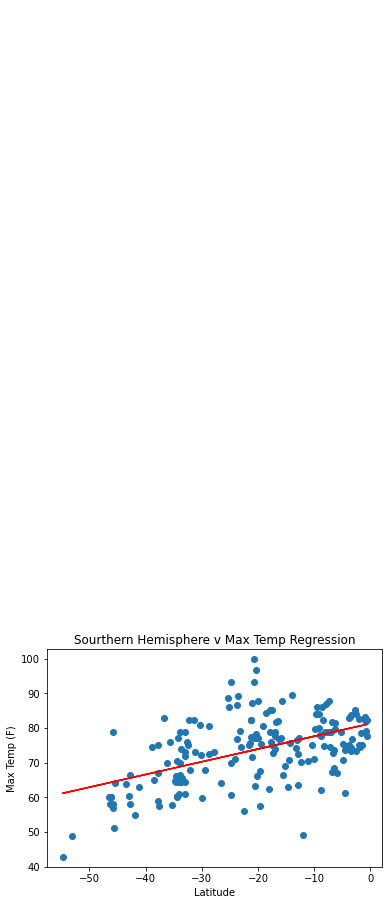

In [17]:
# the x and y values
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Max Temp (F)"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Sourthern Hemisphere v Max Temp Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# annoations,color,fontsize
plt.annotate(line_eq,(-40,285), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/sh_Vs_maxtemp.png")

# Show plot
plt.show()

The graph above is showing a positive correlation 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1590368259727585


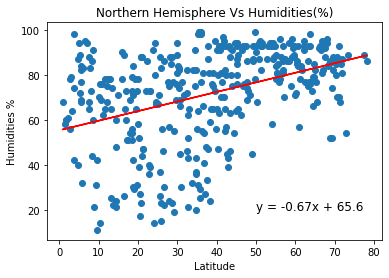

In [18]:
# the x and y values
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Humidities %"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Northern Hemisphere Vs Humidities(%)")
plt.xlabel("Latitude")
plt.ylabel("Humidities %")

# annoations,color,fontsize
plt.annotate(line_eq,(50,20), fontsize=12, color="black")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/nh_Vs_Humidities.png")

# Show plot
plt.show()

The graph above is showing no correlation btw northern hemisphere and humidities. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1434703782029341


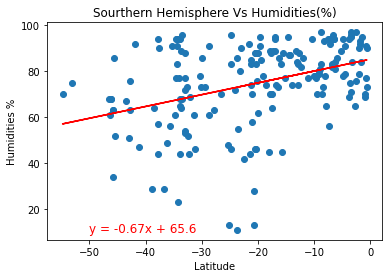

In [19]:
# the x and y values
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Humidities %"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Sourthern Hemisphere Vs Humidities(%)")
plt.xlabel("Latitude")
plt.ylabel("Humidities %")

# annoations,color,fontsize
plt.annotate(line_eq,(-50,10), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/sh_Vs_Humidities.png")

# Show plot
plt.show()

The graph above is showing no correlation btw sourthern hemisphere and humidities. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0816762501380896


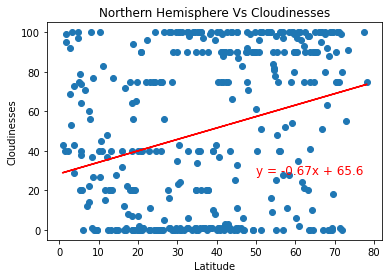

In [20]:
# the x and y values
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Cloudinesses"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Northern Hemisphere Vs Cloudinesses")
plt.xlabel("Latitude")
plt.ylabel("Cloudinesses")

# annoations,color,fontsize
plt.annotate(line_eq,(50,28), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/nh_Vs_Cloudinesses.png")

# Show plot
plt.show()

The graph above is showing no correlation 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17845564841059058


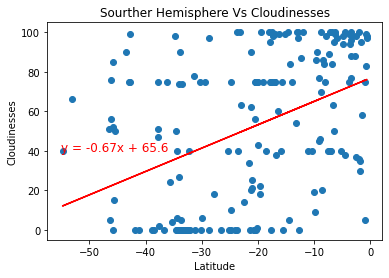

In [21]:
# the x and y values
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Cloudinesses"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Sourther Hemisphere Vs Cloudinesses")
plt.xlabel("Latitude")
plt.ylabel("Cloudinesses")

# annoations,color,fontsize
plt.annotate(line_eq,(-55,40), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/SH_Vs_Cloudinesses.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0025112682462275697


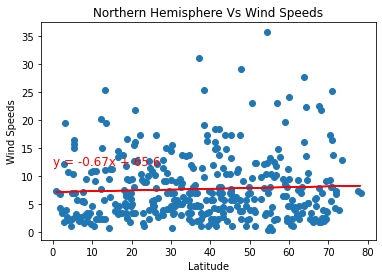

In [22]:
# the x and y values
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Wind Speed"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Northern Hemisphere Vs Wind Speeds")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")

# annoations,color,fontsize
plt.annotate(line_eq,(0,12), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/NH_Vs_Wind Speed.png")

# Show plot
plt.show()

The graph above is showing no correlation btw northern hemisphere and humidities. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.043605001404578216


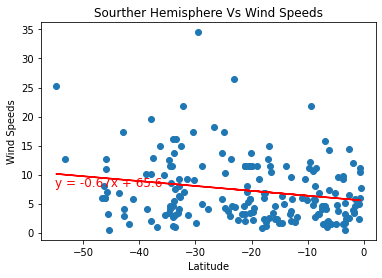

In [23]:
# the x and y values
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Wind Speed"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Sourther Hemisphere Vs Wind Speeds")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")

# annoations,color,fontsize
plt.annotate(line_eq,(-55,8), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/SH_Vs_Wind Speed.png")

# Show plot
plt.show()

The graph above is showing no correlation 